PROYECTO 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

1. ¿Cómo varía el tiempo promedio diario dedicado a redes sociales según la edad y el género del usuario? 

In [2]:
# Cargar el dataset
df = pd.read_csv("social_media_entertainment_data.csv")
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


In [3]:
# Agrupar por género y rango de edad (crear categorías para la edad)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '>60'])
social_media_avg = df.groupby(['Gender', 'Age_Group'])['Daily Social Media Time (hrs)'].mean().reset_index()
print(social_media_avg)

    Gender Age_Group  Daily Social Media Time (hrs)
0   Female       <18                       4.247310
1   Female     18-30                       4.251762
2   Female     31-45                       4.266314
3   Female     46-60                       4.253772
4   Female       >60                       4.262998
5     Male       <18                       4.255827
6     Male     18-30                       4.266644
7     Male     31-45                       4.242591
8     Male     46-60                       4.237797
9     Male       >60                       4.249904
10   Other       <18                       4.358171
11   Other     18-30                       4.240942
12   Other     31-45                       4.235702
13   Other     46-60                       4.253143
14   Other       >60                       4.270761


C:\Users\fabia\AppData\Local\Temp\ipykernel_17136\290501805.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_media_avg = df.groupby(['Gender', 'Age_Group'])['Daily Social Media Time (hrs)'].mean().reset_index()


In [4]:
df['Age_Group'].head()

0    31-45
1      >60
2    46-60
3    31-45
4    18-30
Name: Age_Group, dtype: category
Categories (5, object): ['<18' < '18-30' < '31-45' < '46-60' < '>60']

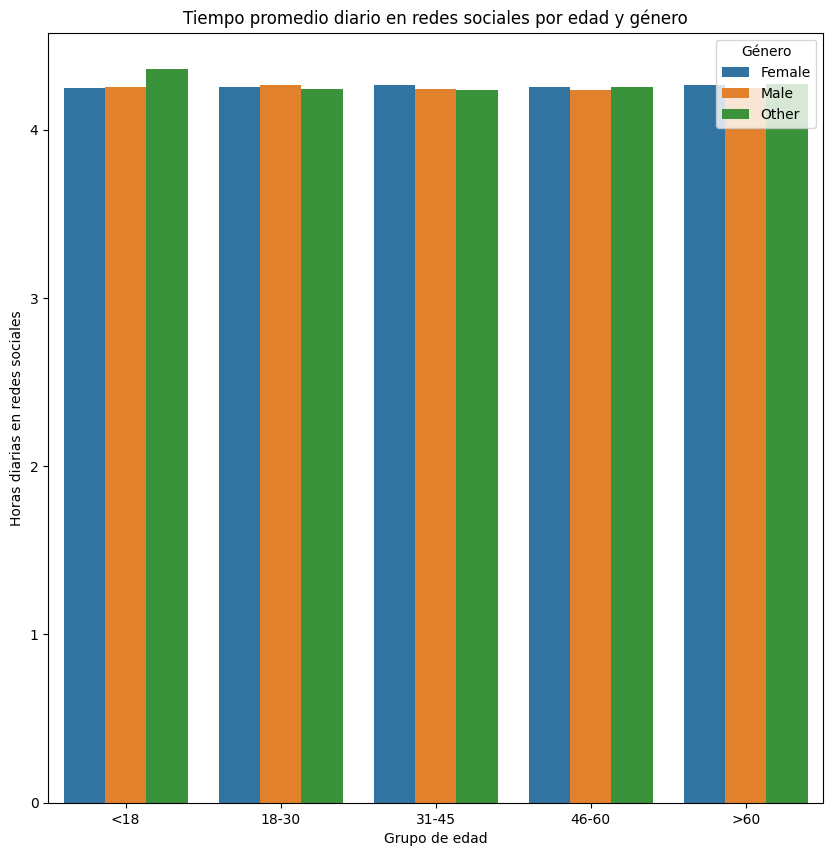

In [5]:

# Visualización
plt.figure(figsize=(10, 10))
sns.barplot(data=social_media_avg, x='Age_Group', y='Daily Social Media Time (hrs)', hue='Gender')
plt.title('Tiempo promedio diario en redes sociales por edad y género')
plt.ylabel('Horas diarias en redes sociales')
plt.xlabel('Grupo de edad')
plt.legend(title='Género')
plt.show()

El gráfico de barras muestra cómo el tiempo dedicado a redes sociales varía entre hombres y mujeres en diferentes grupos de edad. Por ejemplo, podrías observar que los usuarios más jóvenes (18-30) dedican más tiempo que los mayores de 60 años.


Pregunta 2

¿Qué grupos ocupacionales (Occupation) presentan mayor tiempo en comunidades en línea (Time Spent in Online Communities) y cómo se relaciona con el sentimiento de aislamiento social?

In [8]:
# Agrupar por ocupación y calcular el promedio de tiempo en comunidades en línea y sentimiento de aislamiento social
occupation_analysis = df.groupby('Occupation')[['Time Spent in Online Communities (hrs)', 'Social Isolation Feeling (scale 1-10)']].mean().reset_index()


In [9]:
# Ordenar los datos por tiempo en comunidades en línea
occupation_analysis = occupation_analysis.sort_values(by='Time Spent in Online Communities (hrs)', ascending=False)

C:\Users\fabia\AppData\Local\Temp\ipykernel_17136\348991297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_analysis,


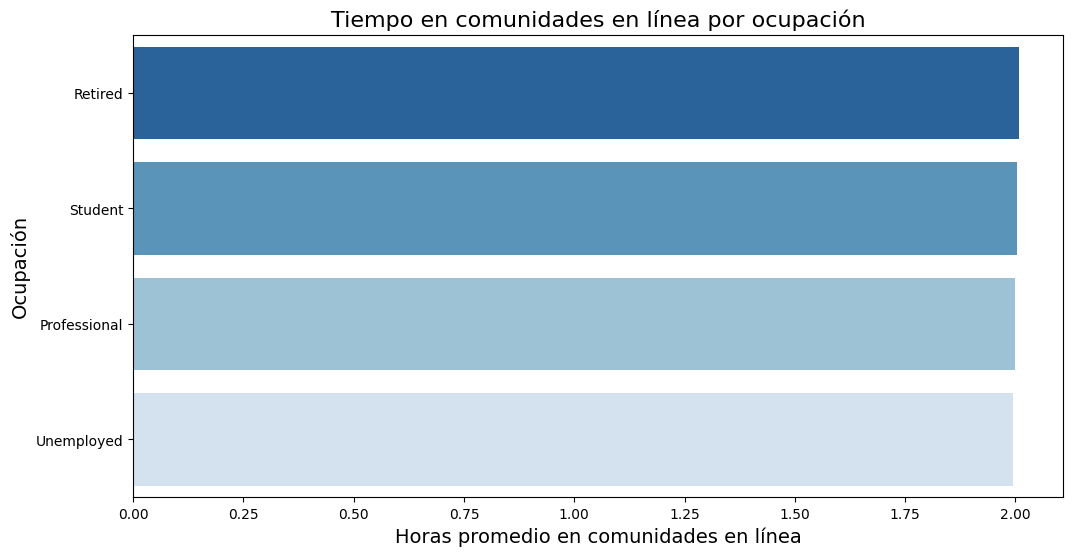

In [10]:
# Visualización: Gráfico de barras para el tiempo en comunidades en línea por ocupación
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_analysis, 
            x='Time Spent in Online Communities (hrs)', 
            y='Occupation', 
            palette='Blues_r')

plt.title('Tiempo en comunidades en línea por ocupación', fontsize=16)
plt.xlabel('Horas promedio en comunidades en línea', fontsize=14)
plt.ylabel('Ocupación', fontsize=14)
plt.show()

Se puede observar cuáles ocupaciones (e.g., estudiantes, profesionales, desempleados) pasan más tiempo en comunidades en línea. Por ejemplo, es probable que los estudiantes pasen más tiempo en foros, mientras que los profesionales quizás pasen menos.

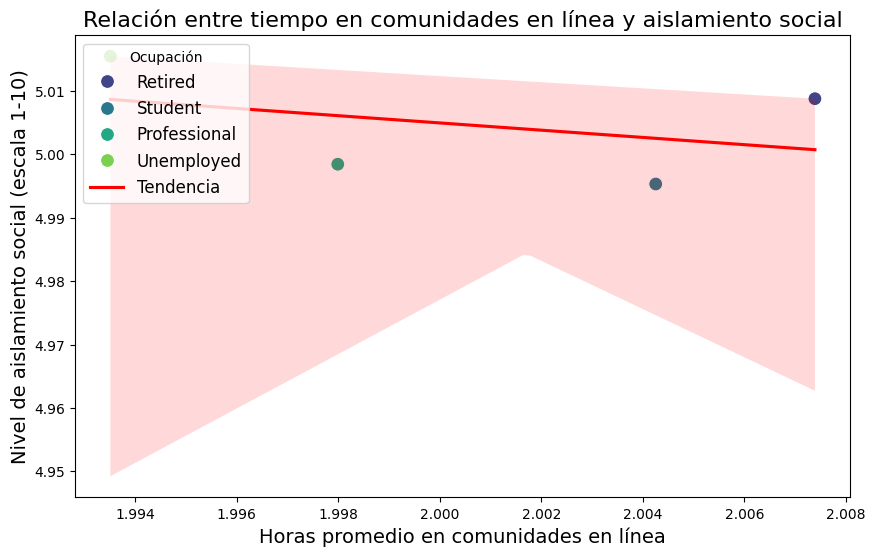

In [11]:
# Visualización: Relación entre tiempo en comunidades en línea y sentimiento de aislamiento social
plt.figure(figsize=(10, 6))
sns.scatterplot(data=occupation_analysis, 
                x='Time Spent in Online Communities (hrs)', 
                y='Social Isolation Feeling (scale 1-10)', 
                hue='Occupation', 
                palette='viridis', 
                s=100)

# Añadir línea de regresión
sns.regplot(data=occupation_analysis, 
            x='Time Spent in Online Communities (hrs)', 
            y='Social Isolation Feeling (scale 1-10)', 
            scatter=False, 
            color='red', 
            label='Tendencia')

plt.title('Relación entre tiempo en comunidades en línea y aislamiento social', fontsize=16)
plt.xlabel('Horas promedio en comunidades en línea', fontsize=14)
plt.ylabel('Nivel de aislamiento social (escala 1-10)', fontsize=14)
plt.legend(title='Ocupación', fontsize=12, loc='upper left')
plt.show()

Si la línea de regresión tiene una pendiente positiva, indica que más tiempo en comunidades en línea está asociado con un mayor sentimiento de aislamiento. Una pendiente negativa sugiere lo contrario. Por lo que al tender una pendiente negativa no significa que haya una correlacion entre las dos variables


Pregunta 3

¿Qué factores influyen más en la cantidad de plataformas de suscripción utilizadas por los usuarios?


In [12]:
# Codificar variables categóricas
df_encoded = df.copy()
for col in ['Gender', 'Occupation', 'Marital Status', 'Device Type']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [13]:
# Variables predictoras y objetivo
X = df_encoded[['Monthly Income (USD)', 'Age', 'Gender', 'Occupation', 'Marital Status']]
y = df_encoded['Subscription Platforms']


In [17]:
# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Importancia de las variables
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importance)


                Feature  Importance
0  Monthly Income (USD)    0.598622
1                   Age    0.192774
4        Marital Status    0.078342
3            Occupation    0.072178
2                Gender    0.058084


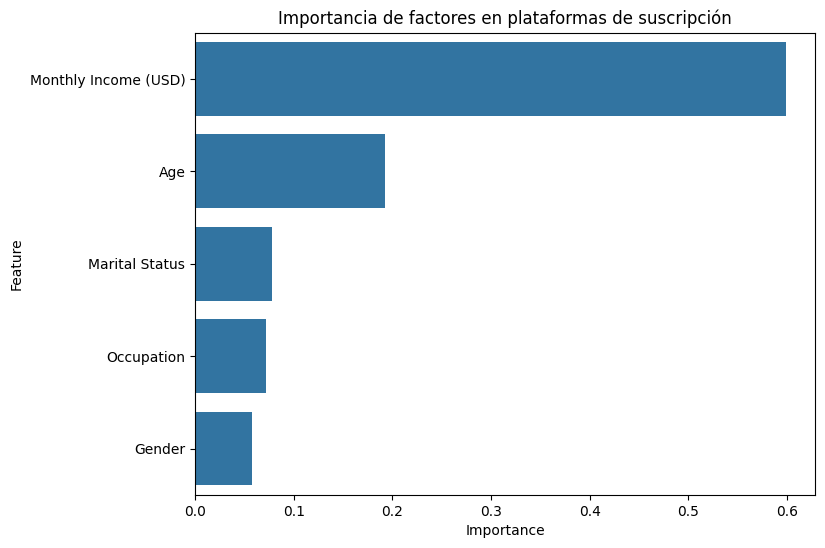

In [19]:
# Visualización
plt.figure(figsize=(8, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Importancia de factores en plataformas de suscripción')
plt.show()

El gráfico de barras muestra qué factores (ingresos, edad, estado marital, etc.) tienen más peso en la cantidad de plataformas de suscripción utilizadas.

Pregunta 4

¿Cuáles son las diferencias en el tiempo promedio dedicado a videojuegos y entretenimiento entre usuarios solteros y casados?

In [64]:
# Agrupación por estado civil
gaming_entertainment_avg = df.groupby('Marital Status')[['Daily Gaming Time (hrs)', 'Daily Entertainment Time (hrs)']].mean()


In [ ]:
# Visualización
gaming_entertainment_avg.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'])
plt.title('Diferencias en tiempo dedicado a videojuegos y entretenimiento')
plt.ylabel('Horas diarias promedio')
plt.xlabel('Estado civil')
plt.legend(['Videojuegos', 'Entretenimiento'])
plt.show()

El gráfico de barras muestra que los usuarios solteros tienden a dedicar más tiempo a videojuegos y entretenimiento, mientras que los casados tienen un patrón diferente.

Pregunta 5

¿Qué combinación de variables (como edad, género y ocupación) predice mejor el tiempo total de pantalla diario (Screen Time)?

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Variables predictoras y objetivo
features = ['Age', 'Gender', 'Occupation']  # Variables demográficas y ocupacionales
target = 'Screen Time (hrs)'               # Variable objetivo

# Convertir variables categóricas a valores numéricos
df_encoded = df.copy()
for col in ['Gender', 'Occupation']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Separar variables predictoras y objetivo
X = df_encoded[features]
y = df_encoded[target]

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Entrenar un Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 8.35
R² Score: -0.00


In [ ]:
# Extraer la importancia de las características
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualización de la importancia
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de variables en la predicción del tiempo de pantalla')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()


In [ ]:
# Visualizar cómo cambia el tiempo de pantalla con la edad, el género y la ocupación
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Screen Time (hrs)', hue='Gender', palette='coolwarm')
plt.title('Distribución del tiempo de pantalla por edad y género')
plt.xlabel('Edad')
plt.ylabel('Horas de pantalla')
plt.legend(title='Género')
plt.show()

# Agrupar por ocupación y calcular el promedio de tiempo de pantalla
occupation_screen_time = df.groupby('Occupation')['Screen Time (hrs)'].mean().sort_values(ascending=False)

# Visualizar tiempo de pantalla por ocupación
plt.figure(figsize=(10, 6))
occupation_screen_time.plot(kind='bar', color='skyblue')
plt.title('Tiempo de pantalla promedio por ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Horas de pantalla promedio')
plt.show()


Los estudiantes podrían tener el mayor tiempo de pantalla debido a tareas escolares y redes sociales.
Los profesionales podrían tener un uso más moderado, relacionado con trabajo.

Si edad tiene alta importancia, los usuarios más jóvenes podrían pasar más tiempo frente a la pantalla.
Si ocupación es clave, es probable que ciertas profesiones impulsen más uso de pantallas.

Este análisis identifica combinaciones de variables que predicen mejor el uso de pantallas y revela patrones en los datos demográficos y ocupacionales. 

Pregunta 6

¿Cómo afecta la plataforma social principal (Primary Platform) al tiempo promedio de interacción con anuncios (Ad Interaction Count)?

C:\Users\fabia\AppData\Local\Temp\ipykernel_9952\1358500347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


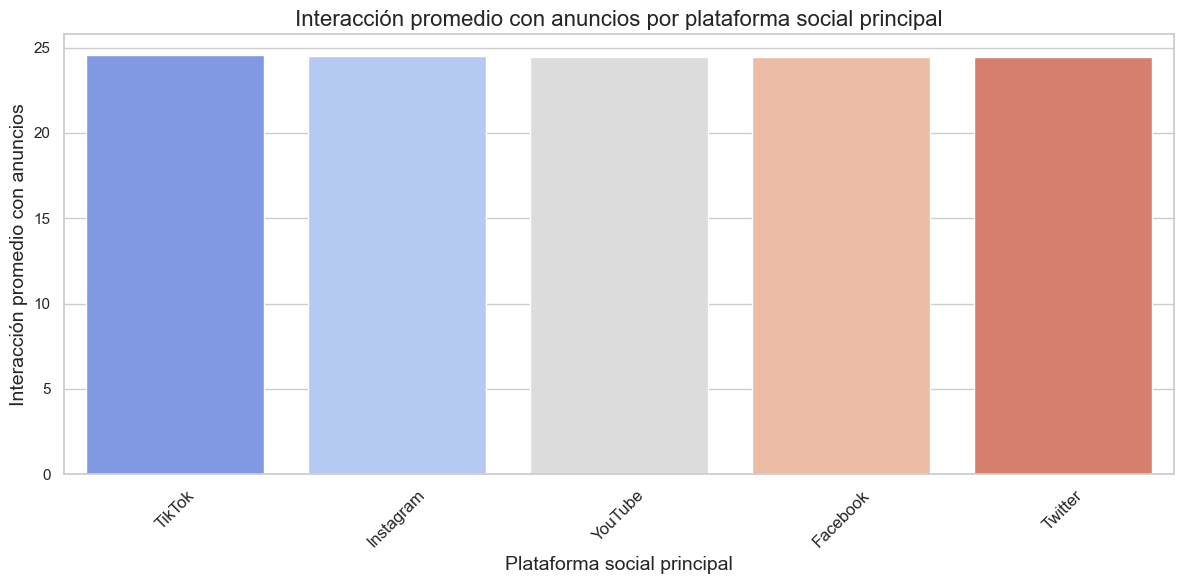

In [57]:
# Agrupar por plataforma social principal y calcular el promedio de interacción con anuncios
platform_ad_interaction = df.groupby('Primary Platform')['Ad Interaction Count'].mean().reset_index()

# Ordenar valores para mejor visualización
platform_ad_interaction = platform_ad_interaction.sort_values(by='Ad Interaction Count', ascending=False)

# Visualización: Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=platform_ad_interaction, 
    x='Primary Platform', 
    y='Ad Interaction Count', 
    palette='coolwarm'
)

# Configuración del gráfico
plt.title('Interacción promedio con anuncios por plataforma social principal', fontsize=16)
plt.xlabel('Plataforma social principal', fontsize=14)
plt.ylabel('Interacción promedio con anuncios', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\fabia\AppData\Local\Temp\ipykernel_9952\3800451104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


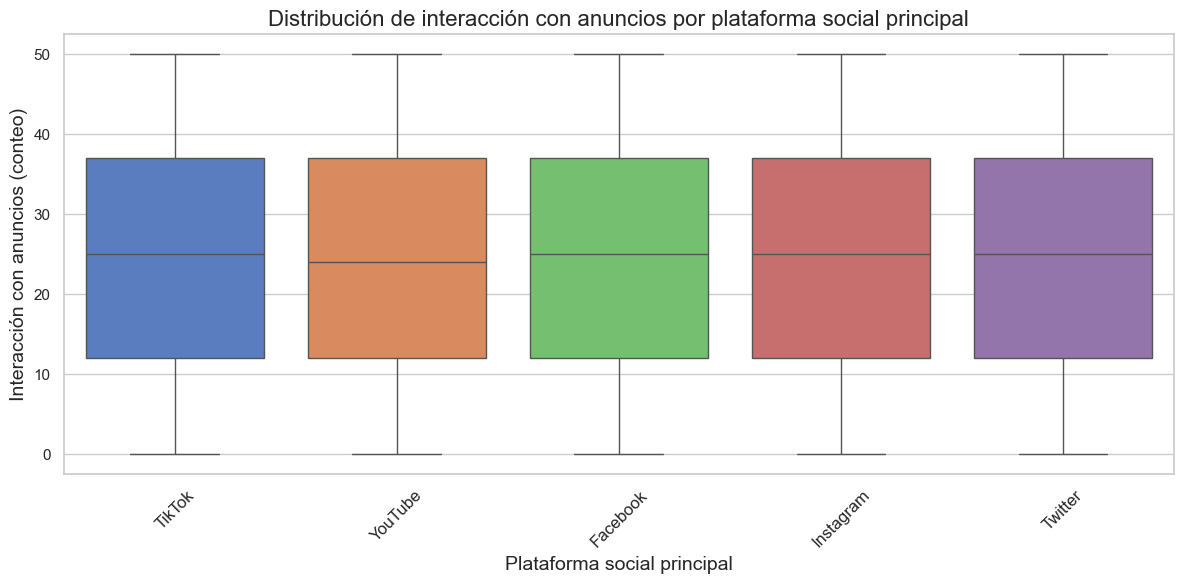

In [55]:
# Visualización: Distribución de interacción con anuncios por plataforma social principal
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='Primary Platform', 
    y='Ad Interaction Count', 
    palette='muted'
)

# Configuración del gráfico
plt.title('Distribución de interacción con anuncios por plataforma social principal', fontsize=16)
plt.xlabel('Plataforma social principal', fontsize=14)
plt.ylabel('Interacción con anuncios (conteo)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [56]:
from scipy.stats import f_oneway

# Separar los datos por plataforma
platform_groups = [group['Ad Interaction Count'].values for _, group in df.groupby('Primary Platform')]

# Prueba ANOVA
f_stat, p_value = f_oneway(*platform_groups)
print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Existen diferencias significativas entre las plataformas en el nivel de interacción con anuncios.")
else:
    print("No se encontraron diferencias significativas entre las plataformas.")


Estadístico F: 0.62
Valor p: 0.6515
No se encontraron diferencias significativas entre las plataformas.


Pregunta 7

¿Existe una relación entre el tiempo dedicado a escuchar música (Daily Music Listening Time) y la percepción de aislamiento social?

C:\Users\fabia\AppData\Local\Temp\ipykernel_9952\2523217561.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\fabia\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


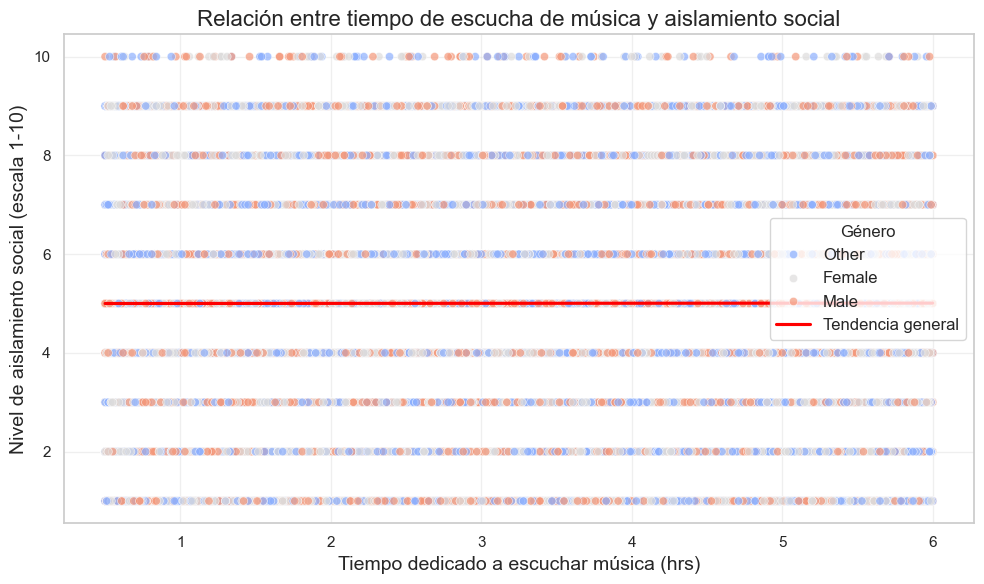

In [53]:
plt.figure(figsize=(10, 6))

# Usar scatterplot para visualizar la relación
sns.scatterplot(
    data=df, 
    x='Daily Music Listening Time (hrs)', 
    y='Social Isolation Feeling (scale 1-10)', 
    alpha=0.7, 
    hue='Gender', 
    palette='coolwarm'
)

# Añadir una línea de tendencia
sns.regplot(
    data=df, 
    x='Daily Music Listening Time (hrs)', 
    y='Social Isolation Feeling (scale 1-10)', 
    scatter=False, 
    color='red', 
    label='Tendencia general'
)

# Configuración del gráfico
plt.title('Relación entre tiempo de escucha de música y aislamiento social', fontsize=16)
plt.xlabel('Tiempo dedicado a escuchar música (hrs)', fontsize=14)
plt.ylabel('Nivel de aislamiento social (escala 1-10)', fontsize=14)
plt.legend(title='Género', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Correlación de Pearson
correlation = df[['Daily Music Listening Time (hrs)', 'Social Isolation Feeling (scale 1-10)']].corr()
print("Correlación entre tiempo dedicado a escuchar música y aislamiento social:")
print(correlation)


In [ ]:
# Crear categorías de usuarios según tiempo dedicado a escuchar música
df['Music Listening Group'] = pd.cut(df['Daily Music Listening Time (hrs)'], 
                                     bins=[0, 1, 3, 10], 
                                     labels=['Poca música (0-1 hrs)', 'Moderada (1-3 hrs)', 'Mucha música (>3 hrs)'])

# Calcular el promedio de aislamiento social por grupo
music_isolation_avg = df.groupby('Music Listening Group')['Social Isolation Feeling (scale 1-10)'].mean().reset_index()

# Visualización
plt.figure(figsize=(8, 6))
sns.barplot(
    data=music_isolation_avg, 
    x='Music Listening Group', 
    y='Social Isolation Feeling (scale 1-10)', 
    palette='Blues_d'
)

# Configuración del gráfico
plt.title('Nivel de aislamiento social por tiempo dedicado a escuchar música', fontsize=16)
plt.xlabel('Grupos de tiempo dedicado a escuchar música', fontsize=14)
plt.ylabel('Nivel promedio de aislamiento social (escala 1-10)', fontsize=14)
plt.tight_layout()
plt.show()

Es probable que exista una relación negativa moderada: escuchar música puede ser una actividad relajante o social, ayudando a reducir la percepción de aislamiento.

Los usuarios que escuchan música durante más de 3 horas al día podrían reportar un menor nivel de aislamiento social que aquellos que escuchan poca o ninguna música.

Pregunta 8

¿Qué dispositivos son más utilizados por los usuarios con ingresos superiores a $5000 USD mensuales y cómo distribuyen su tiempo entre actividades en línea?

In [49]:
# Filtrar usuarios con ingresos mayores a $5000 USD
high_income_users = df[df['Monthly Income (USD)'] > 5000]

In [ ]:
# Contar dispositivos principales
device_counts = high_income_users['Device Type'].value_counts()

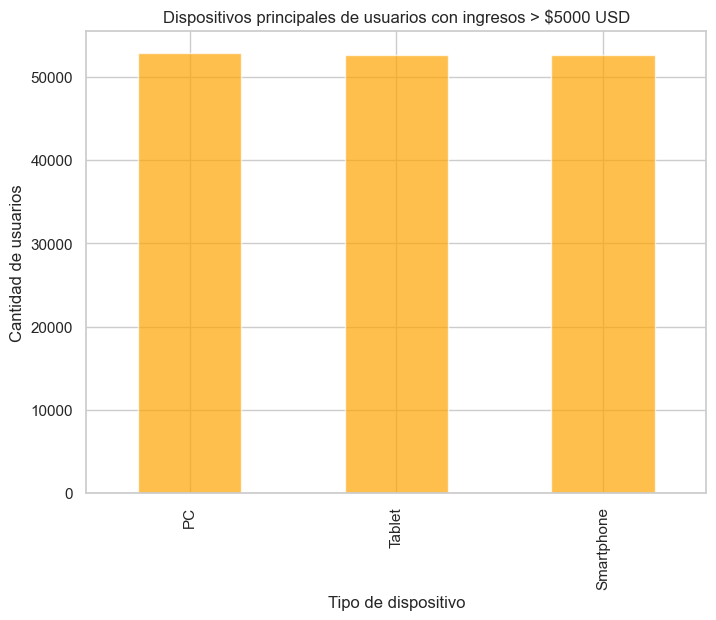

In [50]:

# Visualización de dispositivos
plt.figure(figsize=(8, 6))
device_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Dispositivos principales de usuarios con ingresos > $5000 USD')
plt.ylabel('Cantidad de usuarios')
plt.xlabel('Tipo de dispositivo')
plt.show()

In [51]:
# Promedio de tiempo en actividades en línea
activity_columns = ['Daily Social Media Time (hrs)', 'Daily Messaging Time (hrs)', 
                    'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)']
activity_avg = high_income_users[activity_columns].mean()

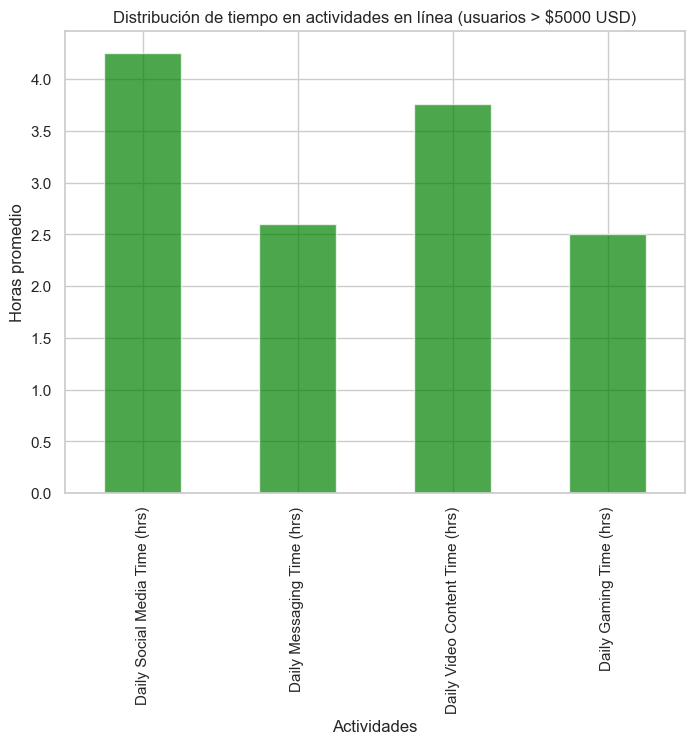

In [65]:

# Visualización de actividades
activity_avg.plot(kind='bar', figsize=(8, 6), color='green', alpha=0.7)
plt.title('Distribución de tiempo en actividades en línea (usuarios > $5000 USD)')
plt.ylabel('Horas promedio')
plt.xlabel('Actividades')
plt.show()

La primera gráfica muestra qué dispositivos usan más los usuarios con ingresos altos, mientras que la segunda revela cómo distribuyen su tiempo entre redes sociales, mensajería, contenido en video y videojuegos.

Pregunta 9

¿Cómo varía el gasto mensual en entretenimiento según el tipo de plataforma preferida y el tipo de contenido?

In [47]:
# Agrupar por plataforma y tipo de contenido preferido
entertainment_spending = df.groupby(['Preferred Entertainment Platform', 'Preferred Content Type'])['Monthly Expenditure on Entertainment (USD)'].mean().reset_index()

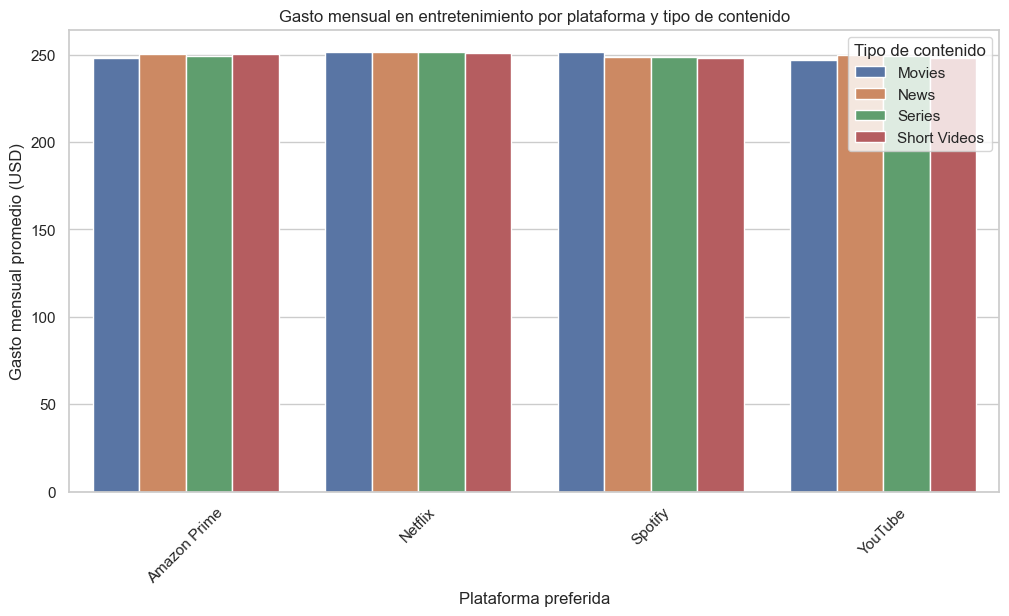

In [48]:
# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=entertainment_spending, x='Preferred Entertainment Platform', y='Monthly Expenditure on Entertainment (USD)', hue='Preferred Content Type')
plt.title('Gasto mensual en entretenimiento por plataforma y tipo de contenido')
plt.ylabel('Gasto mensual promedio (USD)')
plt.xlabel('Plataforma preferida')
plt.xticks(rotation=45)
plt.legend(title='Tipo de contenido')
plt.show()

 El gráfico de barras permite analizar cómo los usuarios con diferentes preferencias de plataforma (e.g., Netflix, Spotify) y contenido (e.g., películas, música) distribuyen su gasto mensual en entretenimiento.

Pregunta 10

¿Los usuarios con ingresos altos gastan más tiempo en plataformas de suscripción que en redes sociales gratuitas?



In [44]:
# Comparar tiempo en plataformas de suscripción vs. redes sociales gratuitas para ingresos altos
subscription_time = high_income_users['Daily Video Content Time (hrs)'].mean()
social_media_time = high_income_users['Daily Social Media Time (hrs)'].mean()

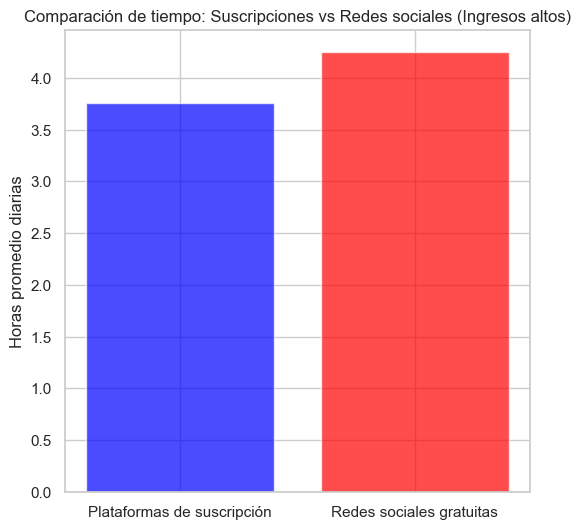

In [45]:
# Visualización
plt.figure(figsize=(6, 6))
plt.bar(['Plataformas de suscripción', 'Redes sociales gratuitas'], [subscription_time, social_media_time], color=['blue', 'red'], alpha=0.7)
plt.title('Comparación de tiempo: Suscripciones vs Redes sociales (Ingresos altos)')
plt.ylabel('Horas promedio diarias')
plt.show()

In [46]:
# Imprimir datos
print(f"Tiempo promedio en plataformas de suscripción: {subscription_time:.2f} hrs")
print(f"Tiempo promedio en redes sociales gratuitas: {social_media_time:.2f} hrs")


Tiempo promedio en plataformas de suscripción: 3.75 hrs
Tiempo promedio en redes sociales gratuitas: 4.25 hrs


El gráfico compara las horas promedio que los usuarios con ingresos altos dedican a plataformas de suscripción (como Netflix o Spotify) frente a redes sociales gratuitas. Esto te permite responder si efectivamente priorizan una sobre la otra.